In [ ]:
import openpyxl
wb = openpyxl.load_workbook('hw.xlsx')
sheet = wb['工作表1']
aa = sheet['B2':'B11']
bb = sheet['D2':'D11']
cc = sheet['C2':'C11']
x1=[]
x2=[]
y=[]
for i in list(aa):
  for c in i:
    x1.append(c.value)
for i in list(bb):
  for c in i:
    y.append(c.value)
for i in list(cc):
  for c in i:
    x2.append(c.value)
print(x1)
print(x2)
print(y)

[100, 50, 100, 100, 50, 80, 75, 80, 90, 90]
[4, 3, 4, 2, 2, 1, 3, 2, 3, 2]
[9.3, 4.8, 8.9, 5.8, 4.2, 6.8, 6.6, 5.9, 7.6, 6.1]


In [ ]:
from math import e
w11,w12,w21,w22,v11,v21=0.5,0.5,0.5,0.5,0.5,0.5
h1,h2=0,0
xx1,xx2=0,0
y1=0.0
learning_rate=0.05
E=[]
temp=[]

def g(u):
  return 1/(1+e**(-u))
def update_weight(a,t):
  return learning_rate*a*t
def delta(t):
  sum=0
  for i in list(t):
    sum+=i
  return sum/len(x1)

for i in range(100):
  sum2=0.0
  ew11,ew12,ew21,ew22,ev11,ev21=[],[],[],[],[],[]
  for j in range(len(x1)):
    t=y[j]
    xx1=x1[j]
    xx2=x2[j]
    h1=g(w11*xx1+w21*xx2)
    h2=g(w12*xx1+w22*xx2)
    y1=g(v11*h1+v21*h2)
    e1=1/2*((y1-t)**2)
    sum2=sum2+e1
    #print("Error:",t-y1)
    yy1=y1*(1-y1)*(t-y1)
    hh1=h1*(1-h1)*v11*yy1
    hh2=h2*(1-h2)*v21*yy1

    ew11.append(update_weight(hh1,xx1))
    ew12.append(update_weight(hh2,xx1))
    ew21.append(update_weight(hh1,xx2))
    ew22.append(update_weight(hh2,xx2))
    ev11.append(update_weight(yy1,h1))
    ev21.append(update_weight(yy1,h2))
  w11=w11+delta(ew11)
  w12=w12+delta(ew12)
  w21=w21+delta(ew21)
  w22=w22+delta(ew22)
  v11=v11+delta(ev11)
  v21=v21+delta(ev21)
  E.append(sum2/10.0)
print("loss值:",E)

loss值: [18.422236703736825, 18.292928724421532, 18.178224049691277, 18.07661286023691, 17.986584944733988, 17.906715246335864, 17.835707414714253, 17.77240979826754, 17.715814912879075, 17.665049982980396, 17.619363395420482, 17.578109948536756, 17.540736489349754, 17.506768729888524, 17.475799559782434, 17.447478907428255, 17.42150506490013, 17.39761732965158, 17.375589796171962, 17.355226133322418, 17.3363551965055, 17.318827341559178, 17.3025113257595, 17.287291698772123, 17.273066602019956, 17.25974590848787, 17.247249646509683, 17.23550666075481, 17.224453471681564, 17.21403330138708, 17.204195239281024, 17.194893525537537, 17.18608693400545, 17.177738239324082, 17.169813755518117, 17.1622829354286, 17.155118022058723, 17.14829374433718, 17.141787050983485, 17.13557687714104, 17.129643939261822, 17.123970554408956, 17.118540480715076, 17.11333877621359, 17.108351673663087, 17.10356646932495, 17.09897142394147, 17.09455567440487, 17.09030915481424, 17.08622252579315, 17.08228711109

Text(0.5, 0, 'epoch')

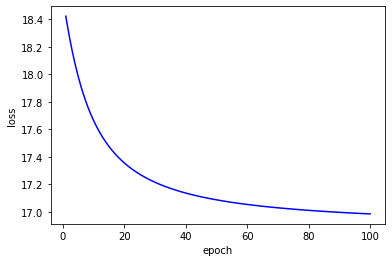

In [ ]:
import matplotlib.pyplot as plt
epoch_count = range(1,101)
plt.plot(epoch_count,E, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')